315.0 -0.636+/-0.004
(1.557+/-0.019)e+04


-19.110000000000003+/-0.0282842712474619

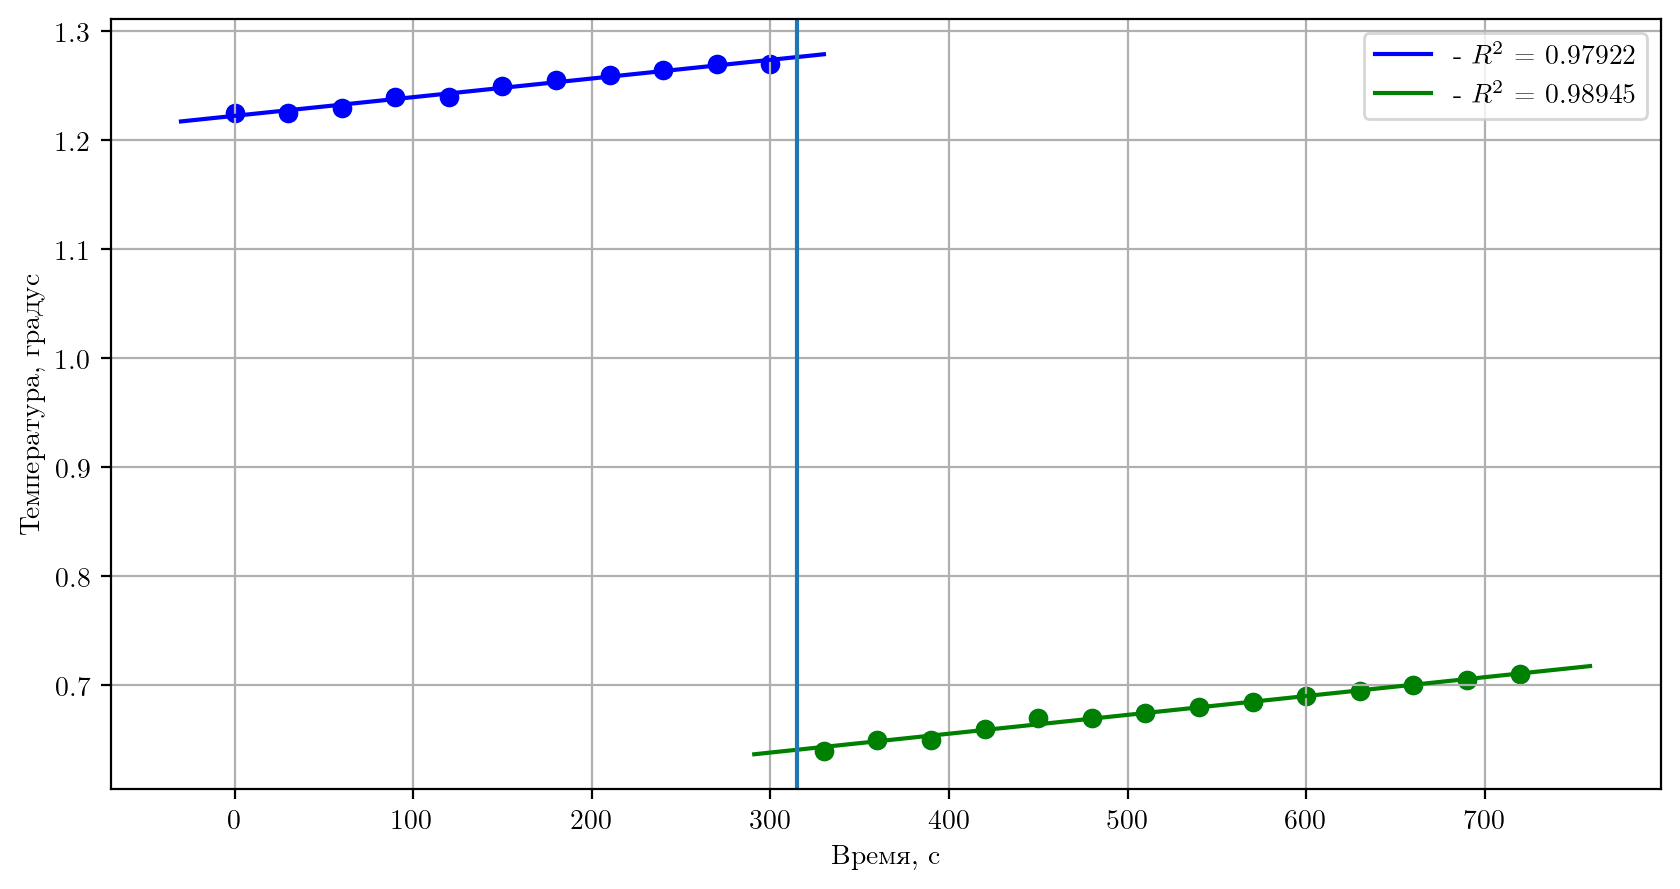

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from IPython.display import display

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from tabulate import tabulate
from IPython.display import display
from uncertainties import umath as um
from uncertainties import unumpy as unp
from uncertainties import ufloat

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",  # Используем засечковый шрифт
    "font.serif": ["Computer Modern"],
    "text.latex.preamble": r"""
        \usepackage[utf8]{inputenc}
        \usepackage[russian]{babel}
        \usepackage[T2A]{fontenc}
    """,
    "pgf.texsystem": "xelatex"
})

def calculate_r2(x, y):
    
    popt, pcov = curve_fit(lambda x,k,b: k*x+b, x,y)

    y_true = y 
    y_pred = popt[0]*x + popt[1]

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    return 1 - (ss_res / ss_tot)

def linear(x, y, label="", **kwargs):
    """Perform linear regression and plot results"""
    # Convert pandas Series to numpy arrays
    x = np.array(x, dtype=float)
    y = np.array(y, dtype=float)
    
    popt, pcov = curve_fit(lambda x, k, b: k*x + b, x, y)
    x_min = np.min(x)
    x_max = np.max(x)
    delta = (x_max - x_min) * 0.1
    x_ax = np.linspace(x_min-delta, x_max+delta, 100)
    y_ax = popt[0] * x_ax + popt[1]
    
    R2 = calculate_r2(x, y)
    
    plt.scatter(x, y,**kwargs)
    plt.plot(x_ax, y_ax, label=f"{label} $R^2$ = {R2:.5f}", **kwargs)
    
    coefs = unp.uarray(popt, np.sqrt(np.diag(pcov)))
    
    return coefs

df = pd.DataFrame({})

df["time"] = np.linspace(0,720,25)
df["temp"] = [1.225,1.225, 1.23, 1.24, 1.24,1.25, 1.255, 1.260, 1.265, 1.270, 1.270, 0.640, 0.650, 0.650, 0.660, 0.670, 0.670,0.675,0.680,0.685, 0.690, 0.695, 0.700, 0.705, 0.710]

m1 = ufloat(47.38,0.02)
m2 = ufloat(28.27,0.02)
m_salt = m2 - m1
M = 53.4915
W = ufloat(8750,8750*0.01)

plt.figure(figsize=(10,5), dpi = 200)
plt.scatter(df.time, df.temp)

x = 11
popt1 = linear(df.time.iloc[:x], df.temp.iloc[:x], "-", color =  "blue")
popt2 = linear(df.time.iloc[x:], df.temp.iloc[x:], "-", color = "green")

x = (df.time.iloc[10]+df.time.iloc[11])/2
y = -(popt1[0] - popt2[0])*x - (popt1[1] - popt2[1])
print(x, y)
plt.axvline(x)

plt.xlabel("Время, c")
plt.ylabel("Температура, градус")
plt.legend()
plt.grid()
plt.savefig("images/calorimetry.png")

print(W*y*M/m_salt)

m_salt